In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1269.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,vin,fleet,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,...,total_engine_hours,total_distance,time_sweetspot,time_idle,time_pto,time_drive,speed,msg_trigger_type,current_fuel_level,received_date
0,MC2M7SRC0HJ051269,Syndicate_Carrier,1249995325,14575,NaN,0,0,18.485618,73.867197,587,...,4009.60,149317.75,1877.45,404.69,0,3603.95,0,PERIODIC,17.200001,01:38.5
1,MC2M7SRC0HJ051269,Syndicate_Carrier,1249995326,14575,NaN,0,0,18.485618,73.867197,587,...,4009.60,149317.75,1877.45,404.69,0,3603.95,0,IGNITION_ON,17.600000,01:38.5
2,MC2M7SRC0HJ051269,Syndicate_Carrier,1249999181,14575,NaN,0,78,18.485971,73.867365,584,...,4009.65,149317.86,1877.45,404.72,0,3603.95,5,PERIODIC,16.400000,04:47.1
3,MC2M7SRC0HJ051269,Syndicate_Carrier,1250003880,14575,NaN,0,0,18.485908,73.867269,581,...,4009.75,149317.92,1877.45,404.77,0,3604.00,0,IGNITION_OFF,17.200001,08:28.7
4,MC2M7SRC0HJ051269,Syndicate_Carrier,1250005442,14575,NaN,0,0,18.485906,73.867265,583,...,4009.75,149317.92,1877.45,404.77,0,3604.00,0,PERIODIC,17.200001,09:45.7


In [3]:
raw_data.describe(include='all')

,vin,fleet,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,...,total_engine_hours,total_distance,time_sweetspot,time_idle,time_pto,time_drive,speed,msg_trigger_type,current_fuel_level,received_date
count,13502,13502,1.350200e+04,13502.0,0.0,13502.0,13502.000000,13502.000000,13502.000000,13502.000000,...,13502.000000,13502.000000,13502.000000,13502.000000,13502.0,13502.000000,13502.000000,13502,13502.000000,13502
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,4248
top,MC2M7SRC0HJ051269,Syndicate_Carrier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERIODIC,NaN,09:07.0
freq,13502,13502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9717,NaN,43
mean,NaN,NaN,1.310710e+09,14575.0,NaN,0.0,63.211080,23.595784,75.311849,412.313879,...,4164.468653,153926.067539,1929.271089,431.752984,0.0,3732.039653,12.220412,NaN,37.159976,NaN
std,NaN,NaN,3.614535e+07,0.0,NaN,0.0,105.320634,4.048001,1.198499,165.095945,...,109.831859,3136.060631,36.903583,18.568697,0.0,85.545590,19.643350,NaN,23.832568,NaN
min,NaN,NaN,1.249995e+09,14575.0,NaN,0.0,0.000000,16.838437,73.699981,146.000000,...,0.000000,149317.750000,1877.450000,404.690000,0.0,3603.950000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,1.282467e+09,14575.0,NaN,0.0,0.000000,19.188856,74.457702,208.000000,...,4064.300000,151046.550000,1893.950000,413.290000,0.0,3650.000000,0.000000,NaN,18.000000,NaN
50%,NaN,NaN,1.309455e+09,14575.0,NaN,0.0,0.000000,23.592519,74.959014,442.000000,...,4160.550000,153534.360000,1924.350000,431.790000,0.0,3727.825000,0.000000,NaN,32.000000,NaN
75%,NaN,NaN,1.340617e+09,14575.0,NaN,0.0,116.000000,28.057274,76.535684,564.000000,...,4256.350000,156518.560000,1958.950000,449.250000,0.0,3806.050000,26.000000,NaN,51.200001,NaN


In [41]:
data = raw_data.drop(['vin','fleet','vehicleid','gtpdriverid','version','time_pto','received_date','address','positionid','updateddate'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,heading,latitude,longitude,altitude,total_fuel_consumption,total_engine_hours,total_distance,time_sweetspot,time_idle,time_drive,speed,msg_trigger_type,current_fuel_level
count,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502.000000,13502,13502.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERIODIC,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9717,NaN
mean,63.211080,23.595784,75.311849,412.313879,41121.503448,4164.468653,153926.067539,1929.271089,431.752984,3732.039653,12.220412,NaN,37.159976
std,105.320634,4.048001,1.198499,165.095945,934.130254,109.831859,3136.060631,36.903583,18.568697,85.545590,19.643350,NaN,23.832568
min,0.000000,16.838437,73.699981,146.000000,0.000000,0.000000,149317.750000,1877.450000,404.690000,3603.950000,0.000000,NaN,0.000000
25%,0.000000,19.188856,74.457702,208.000000,40321.100000,4064.300000,151046.550000,1893.950000,413.290000,3650.000000,0.000000,NaN,18.000000
50%,0.000000,23.592519,74.959014,442.000000,41052.795000,4160.550000,153534.360000,1924.350000,431.790000,3727.825000,0.000000,NaN,32.000000
75%,116.000000,28.057274,76.535684,564.000000,41845.950000,4256.350000,156518.560000,1958.950000,449.250000,3806.050000,26.000000,NaN,51.200001


In [42]:
# This will give us the total number of missing values feature-wise
data.isnull().sum()

heading                   0
latitude                  0
longitude                 0
altitude                  0
total_fuel_consumption    0
total_engine_hours        0
total_distance            0
time_sweetspot            0
time_idle                 0
time_drive                0
speed                     0
msg_trigger_type          0
current_fuel_level        0
dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


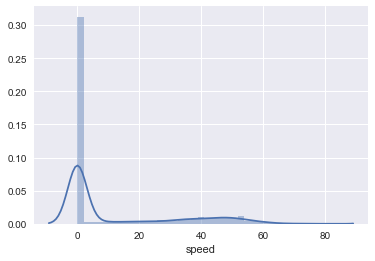

In [43]:
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['speed'])

In [69]:
# I'll simply remove them
q = data['speed'].quantile(0.7)
data_1 = data[data['speed']>q]

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


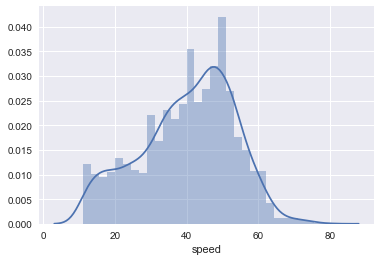

In [70]:
sns.distplot(data_1['speed'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


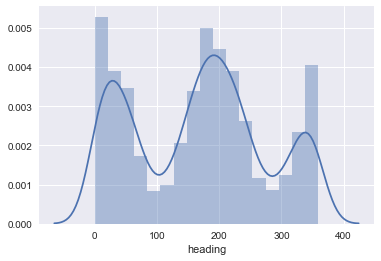

In [71]:
sns.distplot(data_1['heading'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


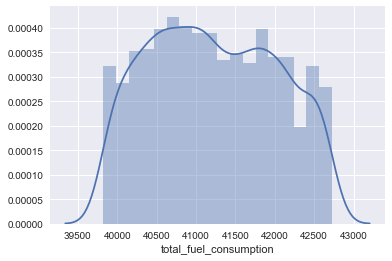

In [72]:
sns.distplot(data_1['total_fuel_consumption'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


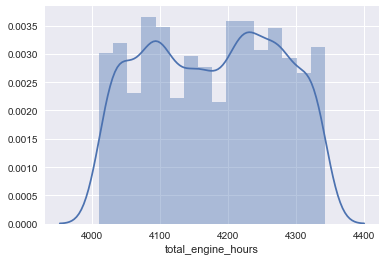

In [73]:
sns.distplot(data_1['total_engine_hours'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


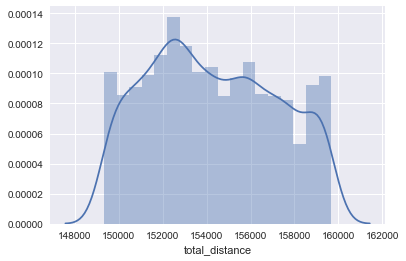

In [74]:
sns.distplot(data_1['total_distance'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


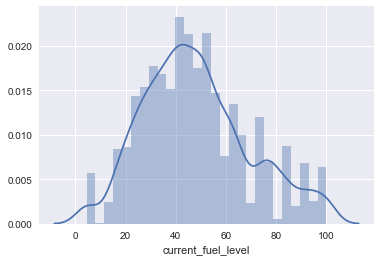

In [75]:
sns.distplot(data_1['current_fuel_level'])

In [76]:
data_1.describe(include='all')

,heading,latitude,longitude,altitude,total_fuel_consumption,total_engine_hours,total_distance,time_sweetspot,time_idle,time_drive,speed,msg_trigger_type,current_fuel_level
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.00000,4039.000000,4039.000000,4039.000000,4039.000000,4039,4039.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERIODIC,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3011,NaN
mean,167.320872,23.193897,75.094116,435.365685,41226.351342,4177.411339,154282.96951,1933.538314,434.144665,3742.233276,40.162169,NaN,48.096856
std,107.791155,3.386571,0.852087,141.759387,799.044454,96.185913,2912.32458,34.204207,17.310349,79.123016,13.114582,NaN,21.291342
min,0.000000,16.849455,73.709010,146.000000,39823.090000,4010.200000,149318.44000,1877.450000,405.060000,3604.150000,11.000000,NaN,4.400000
25%,57.000000,20.126822,74.570515,344.000000,40558.720000,4092.475000,151924.51000,1906.500000,417.240000,3674.225000,32.000000,NaN,32.000000
50%,179.000000,23.017510,74.866997,449.000000,41181.180000,4179.050000,154066.77000,1931.000000,436.310000,3741.700000,42.000000,NaN,44.799999
75%,234.000000,26.291373,75.451784,535.000000,41885.350000,4260.350000,156663.66500,1960.575000,449.500000,3809.800000,50.000000,NaN,61.200001


Text(0.5,1,'Price and Mileage')

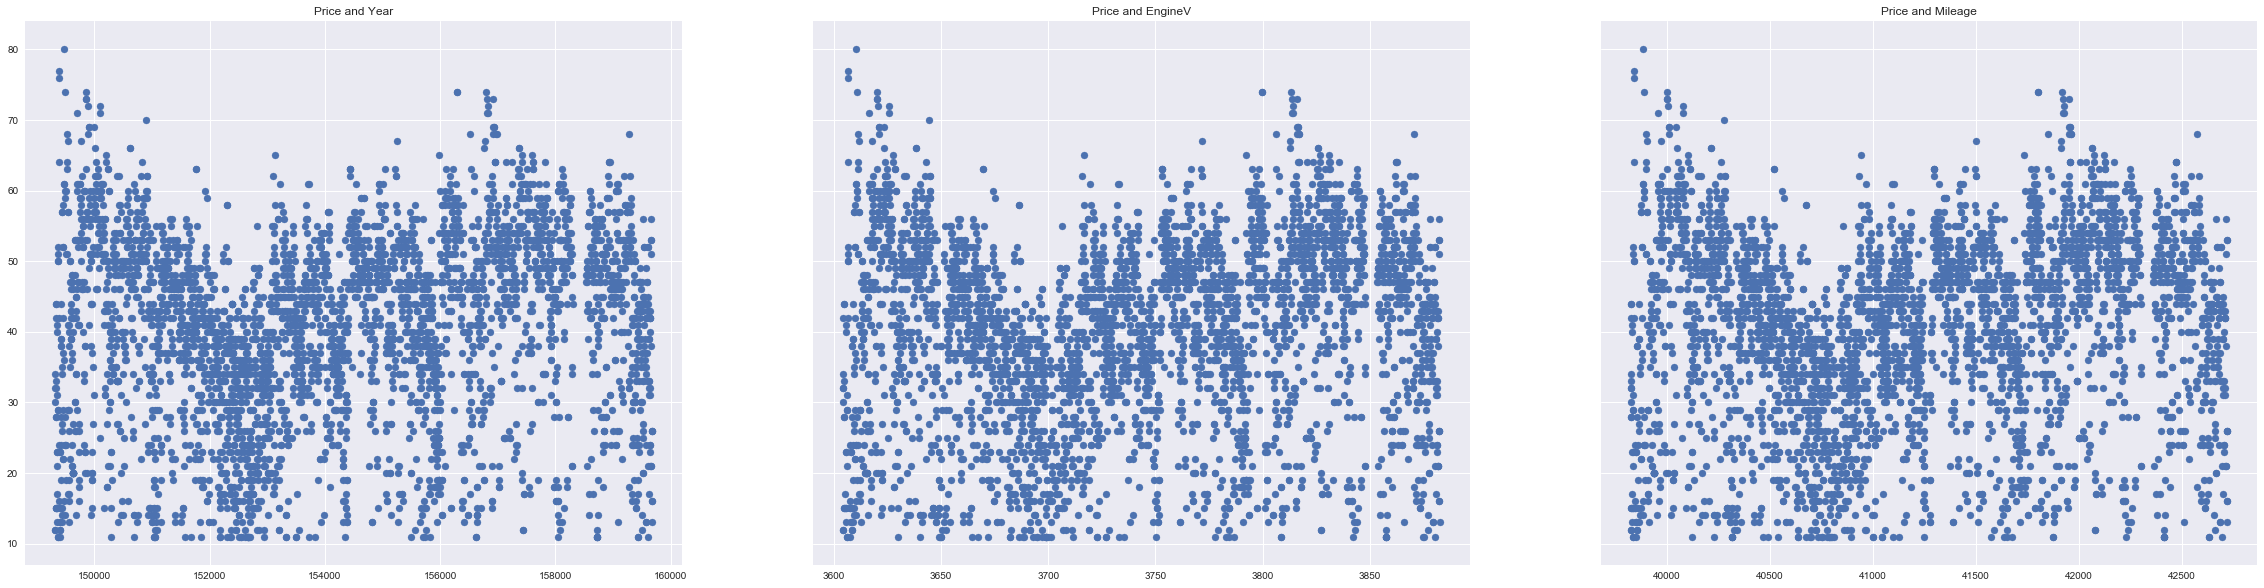

In [82]:
#OLS assumption
#linearity

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(40,10)) #sharey -> share 'Price' as y
ax1.scatter(data_1['total_distance'],data_1['speed'])
ax1.set_title('Price and Year')
ax2.scatter(data_1['time_drive'],data_1['speed'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_1['total_fuel_consumption'],data_1['speed'])
ax3.set_title('Price and Mileage')


In [84]:
# Let's transform 'Price' with a log transformation
log_speed = np.log(data_1['speed'])

# Then we add it to our data frame
data_1['log_speed'] = log_speed
data_1

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,heading,latitude,longitude,altitude,total_fuel_consumption,total_engine_hours,total_distance,time_sweetspot,time_idle,time_drive,speed,msg_trigger_type,current_fuel_level,log_speed
121,348,18.487707,73.866579,584,39823.09,4010.20,149318.44,1877.45,405.06,3604.15,12,PERIODIC_WITH_DISTANCE,18.400000,2.484907
122,348,18.487707,73.866579,584,39823.09,4010.20,149318.44,1877.45,405.06,3604.15,12,PERIODIC,18.400000,2.484907
128,188,18.483707,73.857549,584,39823.67,4010.30,149320.23,1877.45,405.07,3604.25,34,PERIODIC,18.000000,3.526361
129,174,18.467794,73.857832,616,39824.30,4010.40,149322.14,1877.50,405.08,3604.30,30,PERIODIC,16.799999,3.401197
130,174,18.467721,73.857841,617,39824.31,4010.40,149322.17,1877.50,405.08,3604.30,32,PERIODIC_WITH_DISTANCE,17.200001,3.465736
132,79,18.447914,73.862804,642,39825.26,4010.55,149324.95,1877.50,405.13,3604.45,44,PERIODIC,14.800000,3.784190
139,134,18.453155,73.888953,637,39823.86,4010.35,149328.04,1877.50,405.07,3604.30,42,PERIODIC,14.800000,3.737670
148,100,18.450100,73.901447,643,39824.69,4010.55,149330.64,1877.50,405.12,3604.40,32,PERIODIC,14.400000,3.465736
155,70,18.451711,73.920925,641,39825.36,4010.65,149332.94,1877.55,405.13,3604.55,44,PERIODIC,15.600000,3.784190
156,95,18.457394,73.940734,623,39825.76,4010.75,149335.26,1877.55,405.13,3604.60,33,PERIODIC,15.600000,3.496508


Text(0.5,1,'Price and Mileage')

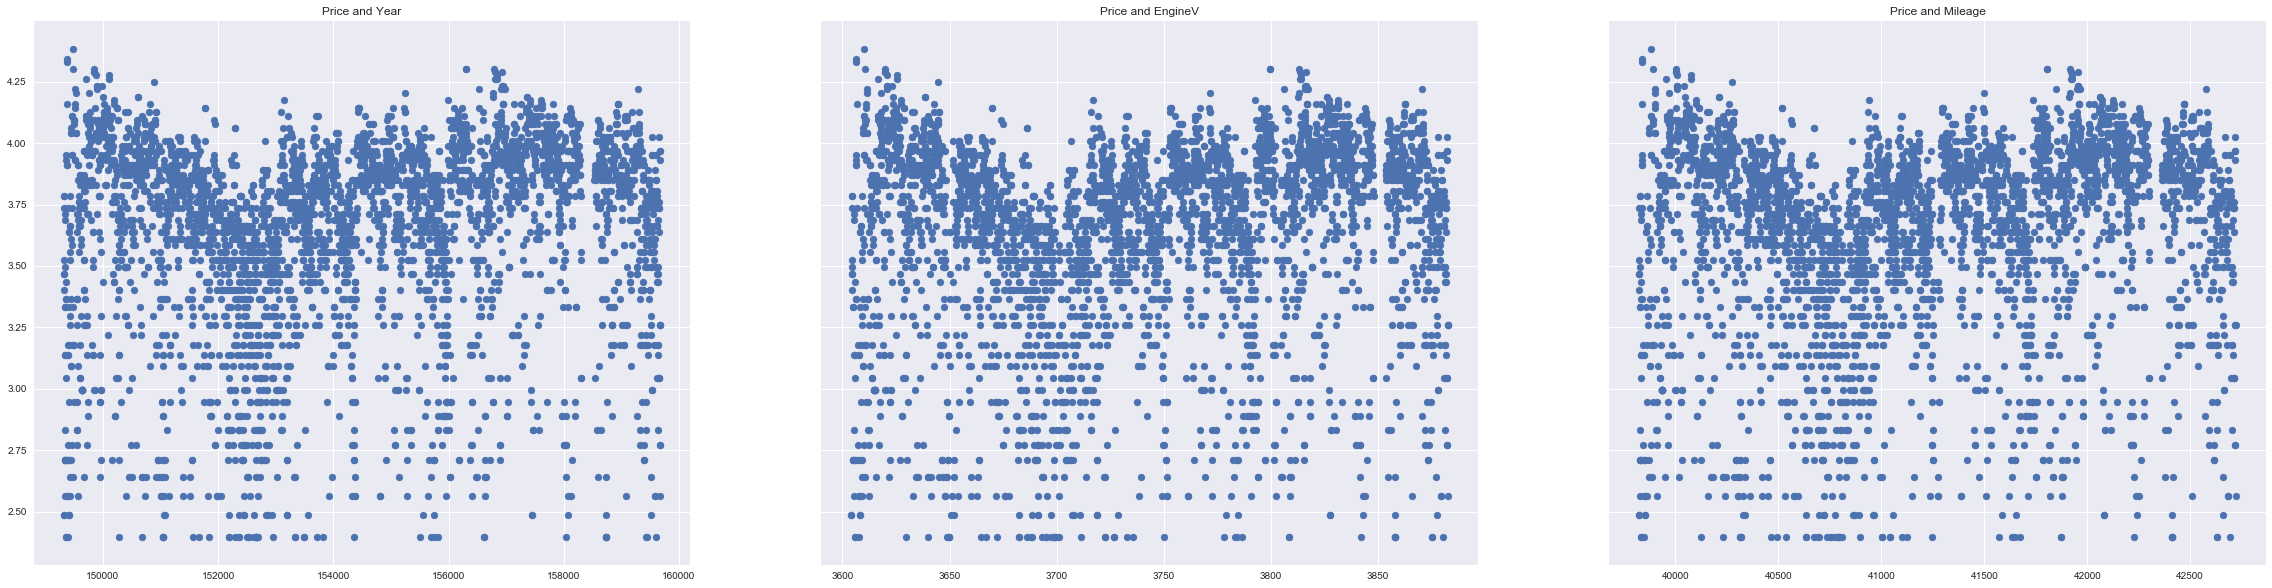

In [85]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(40,10)) #sharey -> share 'Price' as y
ax1.scatter(data_1['total_distance'],data_1['log_speed'])
ax1.set_title('Price and Year')
ax2.scatter(data_1['time_drive'],data_1['log_speed'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_1['total_fuel_consumption'],data_1['log_speed'])
ax3.set_title('Price and Mileage')


In [86]:
# Let's transform 'Price' with a log transformation
log2_speed = np.log(data_1['log_speed'])

# Then we add it to our data frame
data_1['log2_speed'] = log2_speed
data_1

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,heading,latitude,longitude,altitude,total_fuel_consumption,total_engine_hours,total_distance,time_sweetspot,time_idle,time_drive,speed,msg_trigger_type,current_fuel_level,log_speed,log2_speed
121,348,18.487707,73.866579,584,39823.09,4010.20,149318.44,1877.45,405.06,3604.15,12,PERIODIC_WITH_DISTANCE,18.400000,2.484907,0.910235
122,348,18.487707,73.866579,584,39823.09,4010.20,149318.44,1877.45,405.06,3604.15,12,PERIODIC,18.400000,2.484907,0.910235
128,188,18.483707,73.857549,584,39823.67,4010.30,149320.23,1877.45,405.07,3604.25,34,PERIODIC,18.000000,3.526361,1.260266
129,174,18.467794,73.857832,616,39824.30,4010.40,149322.14,1877.50,405.08,3604.30,30,PERIODIC,16.799999,3.401197,1.224128
130,174,18.467721,73.857841,617,39824.31,4010.40,149322.17,1877.50,405.08,3604.30,32,PERIODIC_WITH_DISTANCE,17.200001,3.465736,1.242925
132,79,18.447914,73.862804,642,39825.26,4010.55,149324.95,1877.50,405.13,3604.45,44,PERIODIC,14.800000,3.784190,1.330832
139,134,18.453155,73.888953,637,39823.86,4010.35,149328.04,1877.50,405.07,3604.30,42,PERIODIC,14.800000,3.737670,1.318462
148,100,18.450100,73.901447,643,39824.69,4010.55,149330.64,1877.50,405.12,3604.40,32,PERIODIC,14.400000,3.465736,1.242925
155,70,18.451711,73.920925,641,39825.36,4010.65,149332.94,1877.55,405.13,3604.55,44,PERIODIC,15.600000,3.784190,1.330832
156,95,18.457394,73.940734,623,39825.76,4010.75,149335.26,1877.55,405.13,3604.60,33,PERIODIC,15.600000,3.496508,1.251765


Text(0.5,1,'Price and Mileage')

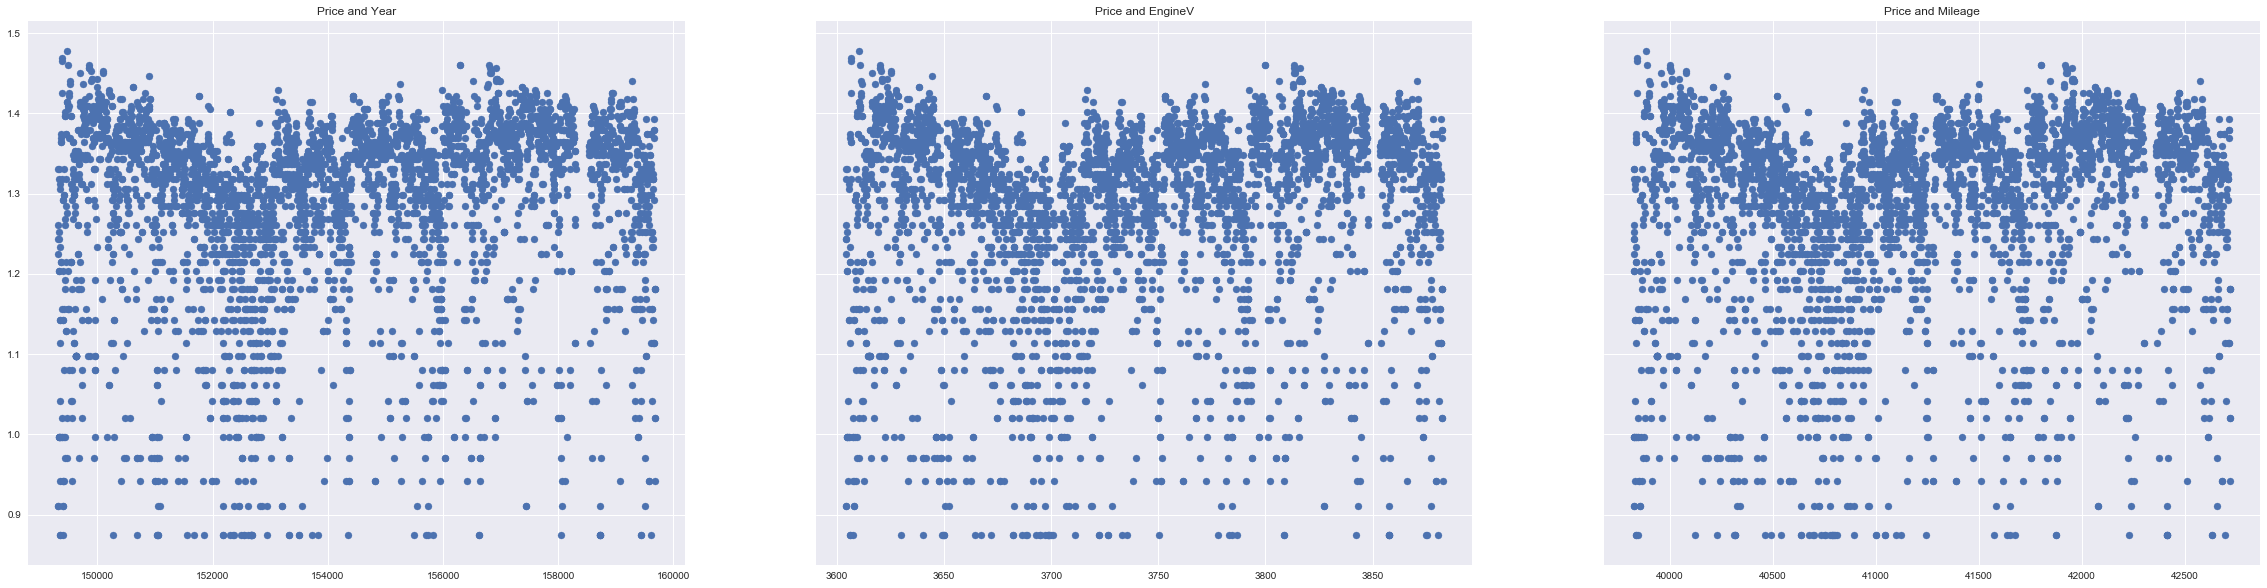

In [87]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(40,10)) #sharey -> share 'Price' as y
ax1.scatter(data_1['total_distance'],data_1['log2_speed'])
ax1.set_title('Price and Year')
ax2.scatter(data_1['time_drive'],data_1['log2_speed'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_1['total_fuel_consumption'],data_1['log2_speed'])
ax3.set_title('Price and Mileage')
